Notebook em **Python** que mostra procedimentos para a obtenção do **Gráfico de Pareto** a partir de um exemplo do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)**

<!-- TEASER_END -->

# Exemplos do livro Six Sigma: A Complete Step-by-Step Guide

![Six Sigma: A Complete Step-by-Step Guide](https://raw.githubusercontent.com/vstram/SixSigmaInR/master/book_cover-small.jpg)

## Conteúdo:
* [Exercício](#Exercício)
* [Procedimento](#Procedimento)
* [Solução Alternativa 1](#Solução-Alternativa-1)
* [Referências](#Referências)

## Exercício

Exemplo (pág 71), refere-se a uma clinica médica com problemas de caixa devido à recusas de serviço médico pela seguradora. As razões para as recusas estão listadas no arquivo "ch05p071.txt".

Pede-se para plotar o Gráfico de Pareto para avaliar as principais causas deste problema.

## Procedimento

1. Carregar os dados do arquivo

Como etapa preliminar, é necessário importar as bibliotecas de código necessárias. Usaremos o `pandas` para manipular os dados e `matplotlib` para visualizá-los

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

A função `read_csv` carrega os dados contidos no CSV e retorna um dataframe pronto para trabalharmos com estes dados

In [3]:
filename = "ch05p071.txt"
df = pd.read_csv(filename)
df

,Type,Count
0,Timely filling,13245
1,Medical Necessety,1423
2,Duplicate claim,18012
3,Clain lack information,4548
4,No Benefeciary found,10215
5,Service not covered,2154
6,Date of service issue,526


2. Preparar os dados carregados, ordenando-os de forma decrescente.

A função `sort_values` do dataframe reordena os dados; para isso, passamos o nome da coluna a ordenar e o `ascending=False` como critério de ordenação

In [4]:
df = df.sort_values(by="Count",ascending=False)
df

,Type,Count
2,Duplicate claim,18012
0,Timely filling,13245
4,No Benefeciary found,10215
3,Clain lack information,4548
5,Service not covered,2154
1,Medical Necessety,1423
6,Date of service issue,526


3. Cria uma nova coluna 'Percent', resultado do calculo do valor de cada item da coluna 'Count' sobre o total desta coluna

In [5]:
df["Percent"] = df["Count"]/df["Count"].sum() * 100
df

,Type,Count,Percent
2,Duplicate claim,18012,35.935598
0,Timely filling,13245,26.424995
4,No Benefeciary found,10215,20.379866
3,Clain lack information,4548,9.073679
5,Service not covered,2154,4.297428
1,Medical Necessety,1423,2.839016
6,Date of service issue,526,1.049418


4. Calcula a coluna que acumula os valores de percentagem, consistindo na coluna de Pareto

In [6]:
df["CumPercent"] = df["Percent"].cumsum()
df

,Type,Count,Percent,CumPercent
2,Duplicate claim,18012,35.935598,35.935598
0,Timely filling,13245,26.424995,62.360593
4,No Benefeciary found,10215,20.379866,82.740458
3,Clain lack information,4548,9.073679,91.814137
5,Service not covered,2154,4.297428,96.111566
1,Medical Necessety,1423,2.839016,98.950582
6,Date of service issue,526,1.049418,100.000000


5. Finalmente, plota o gráfico de Pareto

Acompanhe os comentários no código abaixo:

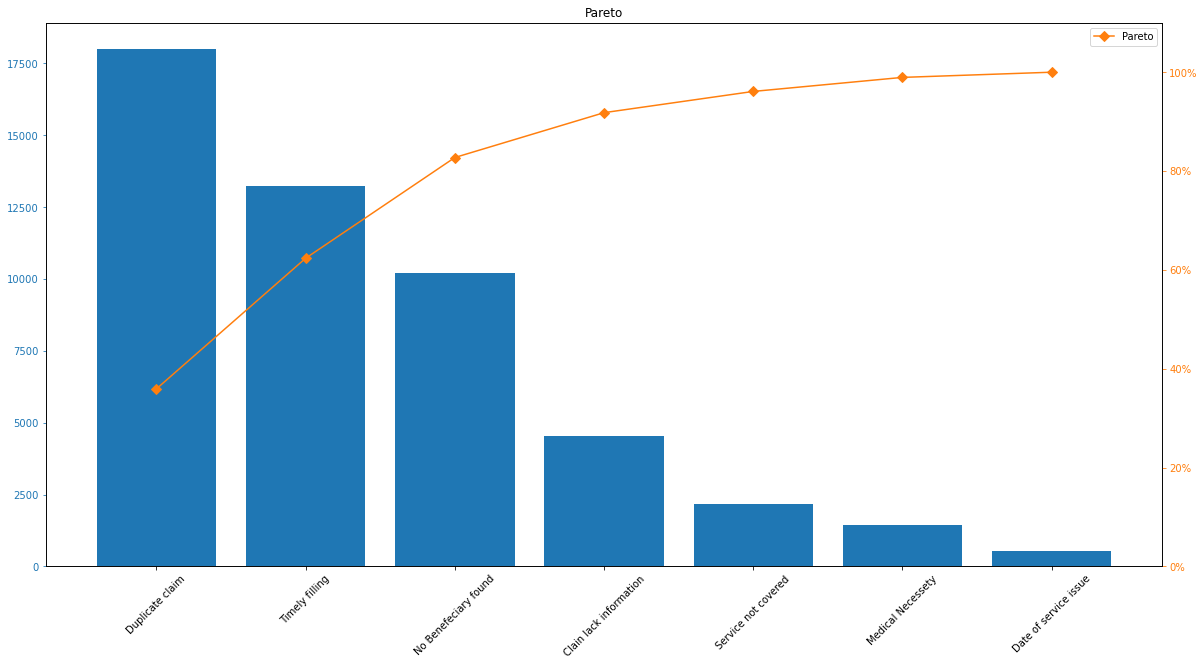

In [7]:
# Cria o barplot e define os dados os eixos, a cor das barras, titulo do gráfico
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df["Type"], df["Count"], color="C0")
ax.set_title("Pareto")

# Eixo secundário
ax2 = ax.twinx()

# Cria a Curva de Pareto no eixo secundário
ax2.plot(df["Type"], df["CumPercent"], color="C1", marker="D", ms=7, label='Pareto')
ax2.yaxis.set_major_formatter(PercentFormatter())

# Configurações dos eixos 
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax2.set_ylim([0,110])

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Finalmente mostra o grafico definido acima
plt.legend() # para mostrar a legenda
plt.show()

## Solução Alternativa 1

A biblioteca `seaborn` é desenvolvida com base na `matplotlib` e possui mais recursos de visualização.

In [8]:
import seaborn as sns

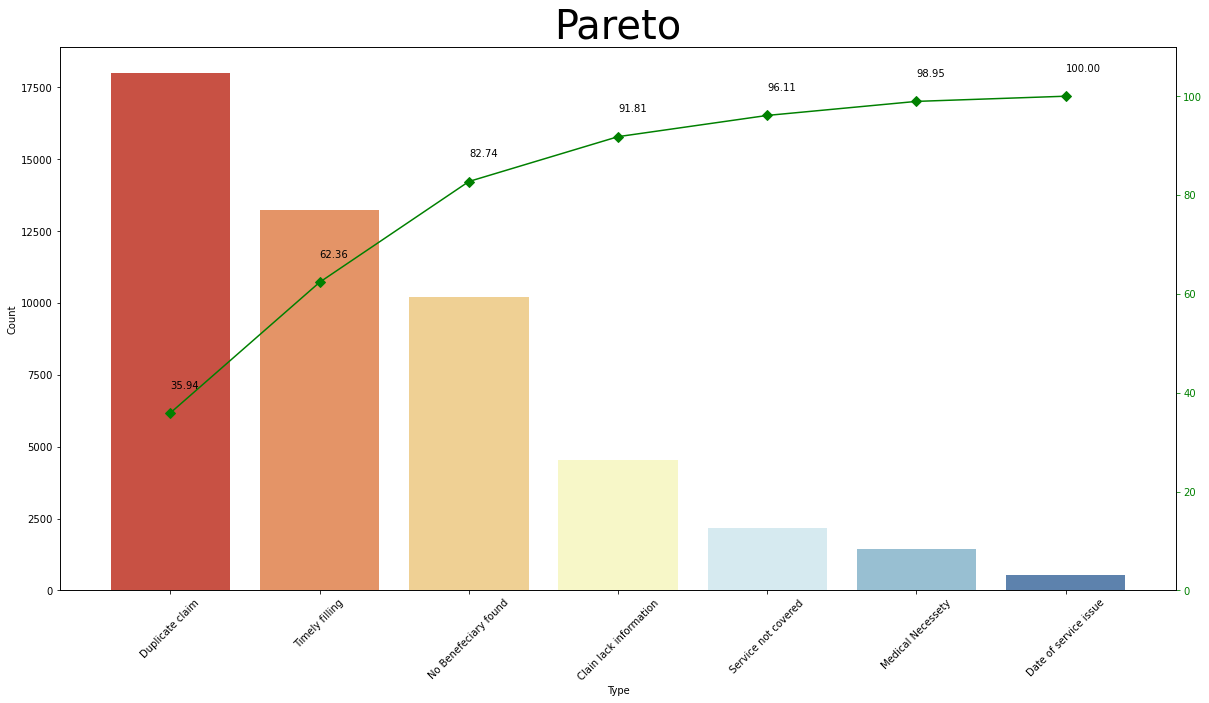

In [10]:
# Cria a barplot, define os eixos e a paleta de cores usada para colorir as barras
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df["Type"], y=df["Count"], palette="RdYlBu")
ax.set_title("Pareto", fontsize=40) # define e ajusta o tamanho da fonte do título

# Eixo secundário
ax2 = ax.twinx()

# Cria a Curva de Pareto no eixo secundário
ax2.plot(df["Type"], df["CumPercent"], color="g", marker="D", ms=7, label='Pareto')

# Configurações dos eixos 
ax2.tick_params(axis="y", colors="g")
ax2.set_ylim([0,110])

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Mostra os labels com a percentagem acumulada em cada ponto
gap = 5
for i in range(len(df["CumPercent"])):
    ax2.annotate("%.2f" % df["CumPercent"][i], (df["Type"][i], df["CumPercent"][i] + gap))
    

A `seaborn`, por ser derivada da `matplotlib`, compartilha de muitas das soluções de configuração. A grande vantagem dela reside no fato de possuir uma API mais preparada para análises estatísticas.

## Referências

Este notebook contém exemplos do livro **[Six Sigma: A Complete Step-by-Step Guide](https://www.sixsigmacouncil.org/wp-content/uploads/2018/08/Six-Sigma-A-Complete-Step-by-Step-Guide.pdf)** disponibilizado pelo [The Council for Six Sigma Certification](https://www.sixsigmacouncil.org/six-sigma-training-material/)

Bibliotecas utilizadas:
* [pandas](https://pandas.pydata.org/docs/index.html)
* [matplotlib](https://matplotlib.org/index.html)
* [seaborn](https://seaborn.pydata.org/index.html)